In [96]:
import openpyxl as xl
import pandas as pd

from city_walls import warm_colors

file_path = '/Users/meredithsmith/Desktop/TØPAnalysis/11GoodTØPTours.xlsx'
df= pd.read_excel(file_path)

ModuleNotFoundError: No module named 'city_walls'

In [ ]:
geo = '/Users/meredithsmith/Desktop/TØPAnalysis/geocoded_cities.xlsx'
df_geo = pd.read_excel(geo, usecols = [0,1,2])

In [ ]:
# 2. Rename the first column (index 0) to 'location_string'
df_geo.columns.values[0] = 'location_string'
df_geo.columns.values[1] = 'latitude'
df_geo.columns.values[2] = 'longitude'



In [ ]:
df_geo.columns

In [ ]:
df_geo.info

In [ ]:
df_geo.columns

In [ ]:
df.info

https://www.geeksforgeeks.org/data-analysis/data-cleansing-introduction/

#### Identify Column Data Types

In [ ]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

print('Categorical columns:', cat_col)
print('Numerical columns:', num_col)

#### Count Unique Values

In [ ]:
df[cat_col].nunique()

#### Calculate Missing Values as Percentage

In [ ]:
round((df.isnull().sum() / df.shape[0]) * 100, 2)

### Drop Irrelevant or Data - Heavy Missing Columns

In [ ]:
df1 = df.drop(columns=['Unnamed: 4', 'Suffix', 'Lineup', 'Signed Under', 'Unnamed: 14'])


In [ ]:
df1.dtypes

In [ ]:
df1.columns = df1.columns.str.strip()

In [ ]:
df1.head()

In [ ]:
# Returns a count of every date associated with each tour
tour_counts = df1['Tour'].value_counts()
tour_counts

In [ ]:
# Groups by Tour and counts the number of entries in the Date column
tour_summary = df1.groupby('Tour')['Date'].count().reset_index()
tour_summary.columns = ['Tour', 'Number_of_Dates']
print(tour_summary)

In [ ]:
import matplotlib.pyplot as plt

df1['Tour'].value_counts().plot(kind='bar')
plt.title('Number of Dates per Tour')
plt.xlabel('Tour Name')
plt.ylabel('Count')
plt.show()

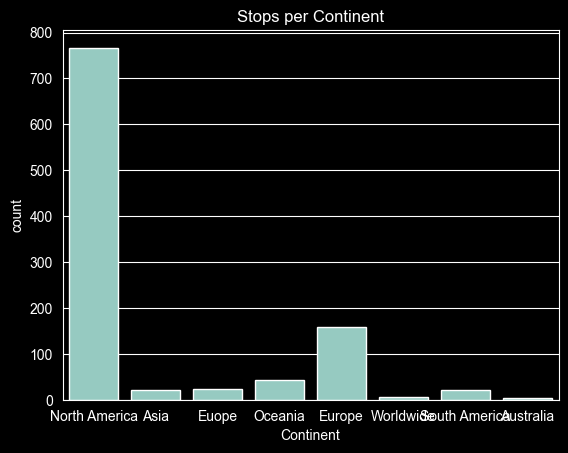

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Strip leading/trailing whitespace and tabs from the continent column
df1['Continent'] = df1['Continent'].str.strip()

# Now plot again
sns.countplot(data=df1, x='Continent')
plt.title('Stops per Continent')
plt.show()

In [98]:
import pandas as pd

# Grouping by continent and summing the population
continent_stats = df1.groupby('Continent')['Legs'].sum().reset_index()

print(continent_stats)

       Continent   Legs
0           Asia   21.0
1      Australia    4.0
2          Euope   24.0
3         Europe  158.0
4  North America  764.0
5        Oceania   43.0
6  South America   21.0
7      Worldwide    6.0


              Country   Legs
0      Allianz Parque    1.0
1           Argentina    5.0
2           Australia   40.0
3             Austria    7.0
4             Belgium   10.0
5              Brazil    5.0
6              Canada   35.0
7               Chile    4.0
8               China    2.0
9            Colombia    3.0
10     Czech Republic    4.0
11            Denmark    3.0
12            England    5.0
13      Farmasi Arena    1.0
14            Finland    2.0
15             France   15.0
16            Germany   25.0
17            Hungary    1.0
18            Ireland    4.0
19              Italy    7.0
20              Japan   10.0
21              Korea    2.0
22             Latvia    1.0
23             Mexico   15.0
24        Netherlands   12.0
25        New Zealand    7.0
26             Norway    4.0
27           Paraguay    2.0
28        Philippines    2.0
29             Poland    3.0
30           Portugal    1.0
31  Republic of Korea    1.0
32             Russia    4.0
33           S

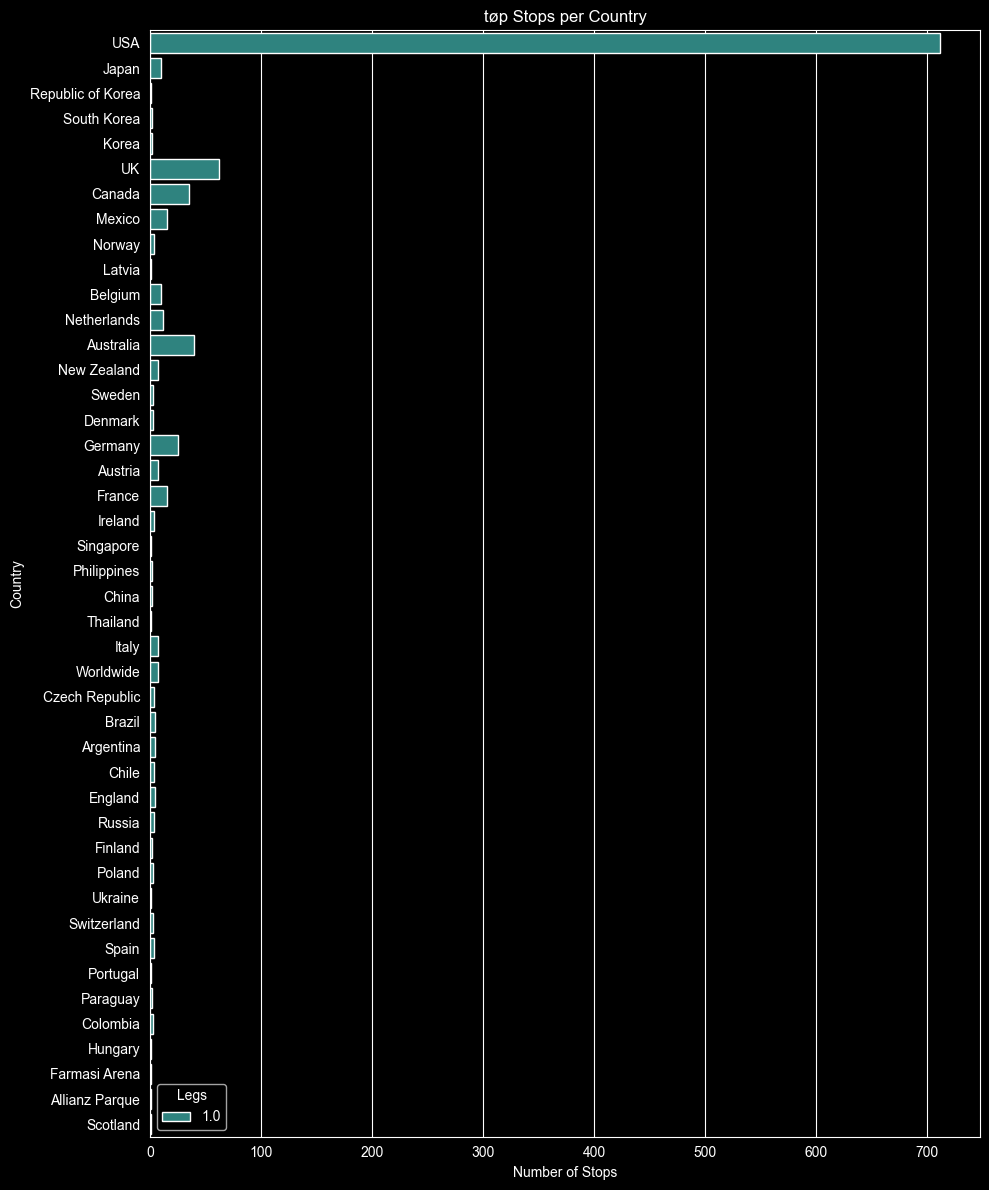

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

df1['Country'] = df1['Country'].str.strip()
# Grouping by continent and summing the population
country_stats = df1.groupby('Country')['Legs'].sum().reset_index()

print(country_stats)

# Set the figure size so the country names aren't squashed
plt.figure(figsize=(10, 12))

# Use countplot to actually count occurrences of each country
sns.countplot(data=df1, y="Country", hue = 'Legs', palette="viridis")

plt.title('tøp Stops per Country')
plt.xlabel('Number of Stops')
plt.ylabel('Country')

# Optional: Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()

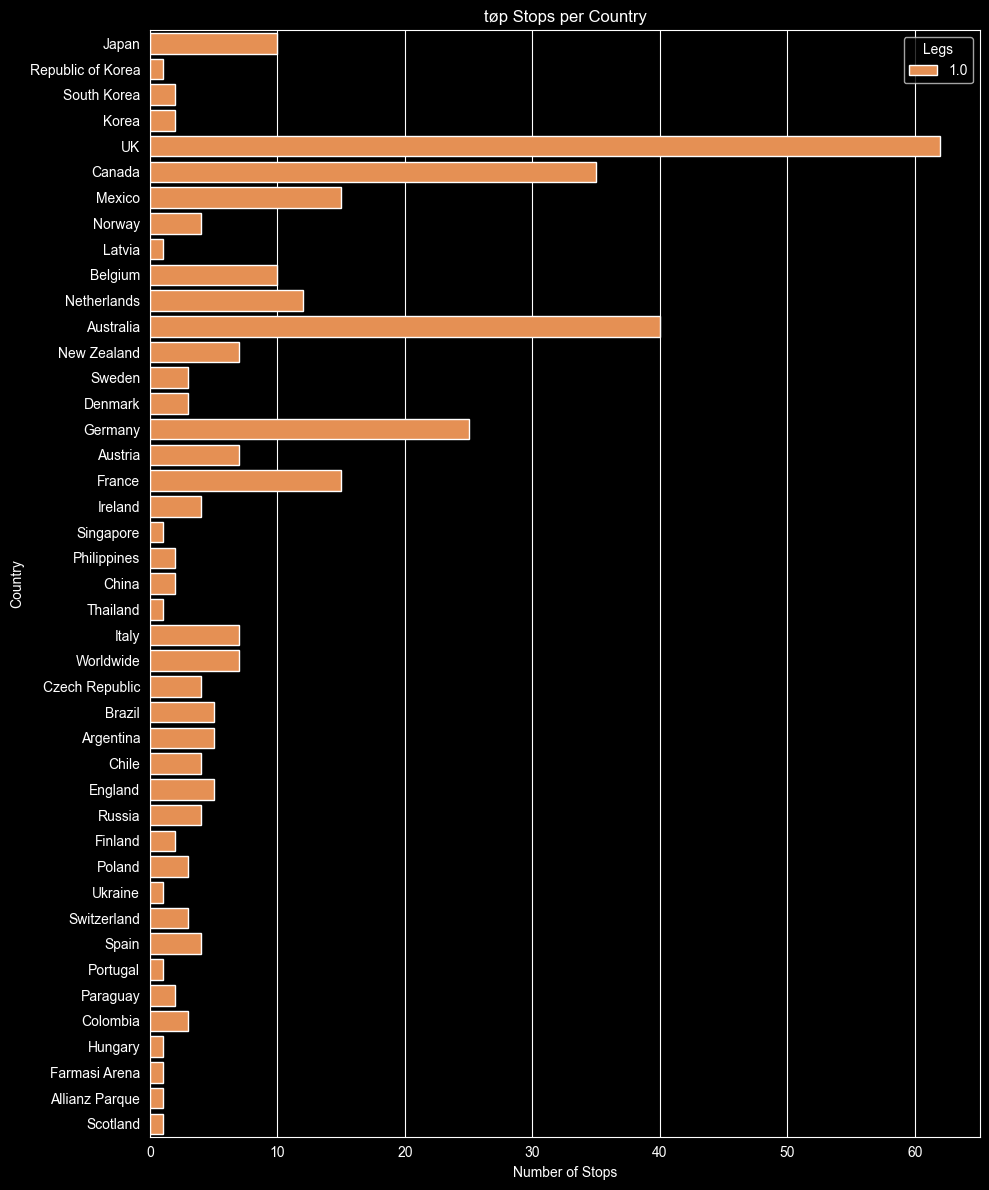

In [100]:
# Filter out a specific country
df_filtered = df1[df1['Country'] != 'USA']

# Set the figure size so the country names aren't squashed
plt.figure(figsize=(10, 12))

# Use countplot to actually count occurrences of each country
sns.countplot(data=df_filtered, y="Country", hue ='Legs', palette="YlOrRd")

plt.title('tøp Stops per Country')
plt.xlabel('Number of Stops')
plt.ylabel('Country')

# Optional: Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()

In [101]:
# Use .copy() to create a dedicated DataFrame
df_usa = df1[df1['Country'] == 'USA'].copy()

# Now this operation will not trigger a warning
df_usa['State'] = df_usa['State'].str.strip()

In [102]:
import nbformat as nbf
import plotly.express as px
import ipywidgets as widgets

# Count the occurrences of each state
state_counts = df_usa['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

# Create an interactive map
fig = px.choropleth(state_counts,
                    locations='State',
                    locationmode="USA-states",
                    color='Count',
                    scope="usa",
                    title='tøp Tour Stop Counts by State')
fig.show()

In [103]:
import nbformat as nbf
import plotly.express as px
import ipywidgets as widgets

# Count the occurrences of each state
country_counts = df_filtered['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'CCount']

# Create an interactive map
fig = px.choropleth(country_counts,
                    locations='Country',
                    locationmode='country names',
                    color='CCount',
                    title='tøp Tour Stop Counts by Country')
fig.show()

/var/folders/b3/c2r9247s37z1czpqz37hrcd40000gn/T/ipykernel_5901/4237904682.py:10: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



In [104]:
df.head()

,Members,Associated Albums,Date,Tour,Unnamed: 4,City,State,Country,Continent,Venue,Suffix,Legs,Lineup,Signed Under,Unnamed: 14
0,"Tyler Joseph, Nick Thomas, Chris Salih",NaN,2009-07-08 00:00:00,NaN,NaN,Columbus,OH,USA,North America,Expresso Yourself Music Café,NaN,1.0,NaN,NaN,NaN
1,"Tyler Joseph, Nick Thomas, Chris Salih",NaN,2009-10-11 00:00:00,NaN,NaN,Columbus,OH,USA,North America,Battle of the Bands at the Alrosa Villa,NaN,1.0,NaN,NaN,NaN
2,"Tyler Joseph, Nick Thomas, Chris Salih",NaN,2009-12-29 00:00:00,NaN,NaN,Columbus,OH,USA,North America,The Basement,NaN,1.0,NaN,NaN,NaN
3,"Tyler Joseph, Nick Thomas, Chris Salih",Twenty Øne Pilots (Self-Titled),2010-01-16 00:00:00,NaN,NaN,Columbus,OH,USA,North America,Newport Music Hall,NaN,1.0,NaN,NaN,NaN
4,"Tyler Joseph, Nick Thomas, Chris Salih",Twenty Øne Pilots (Self-Titled),2010-02-19 00:00:00,NaN,NaN,Columbus,OH,USA,North America,Newport Music Hall,NaN,1.0,NaN,NaN,NaN


In [105]:
print(df.columns)

Index(['Members', 'Associated Albums', 'Date', 'Tour', 'Unnamed: 4', 'City ',
       'State', 'Country', 'Continent', 'Venue', 'Suffix', 'Legs', 'Lineup',
       'Signed Under', 'Unnamed: 14'],
      dtype='object')


In [106]:
df1=df.copy()

# Combine columns 'Col1', 'Col2', and 'Col3' with a comma and space
# Note: astype(str) is used to ensure numerical columns don't cause errors
df1['location_string'] = df1['City '].astype(str) + ', ' + df1['State'].astype(str) + ', ' + df1['Country'].astype(str)

print(df_geo)

             location_string   latitude   longitude
0          Columbus, OH, USA  39.962260  -83.000707
1         Kettering, OH, USA  39.689504  -84.168827
2         Cleveland, OH, USA  41.499657  -81.693677
3            Canton, OH, USA  40.798546  -81.374951
4        Middletown, OH, USA  39.516644  -84.404173
..                       ...        ...         ...
400    \tAlpharetta, GA, USA  34.075596  -84.294596
401  \tBirmingham\t, AL, USA  33.520682  -86.802433
402        \tRogers, AR, USA  36.334857  -94.119382
403      \tDallas\t, TX, USA  32.776272  -96.796856
404   \tChula Vista, CA, USA  32.640054 -117.084195

[405 rows x 3 columns]


In [107]:
df1.head()

,Members,Associated Albums,Date,Tour,Unnamed: 4,City,State,Country,Continent,Venue,Suffix,Legs,Lineup,Signed Under,Unnamed: 14,location_string
0,"Tyler Joseph, Nick Thomas, Chris Salih",NaN,2009-07-08 00:00:00,NaN,NaN,Columbus,OH,USA,North America,Expresso Yourself Music Café,NaN,1.0,NaN,NaN,NaN,"Columbus, OH, USA"
1,"Tyler Joseph, Nick Thomas, Chris Salih",NaN,2009-10-11 00:00:00,NaN,NaN,Columbus,OH,USA,North America,Battle of the Bands at the Alrosa Villa,NaN,1.0,NaN,NaN,NaN,"Columbus, OH, USA"
2,"Tyler Joseph, Nick Thomas, Chris Salih",NaN,2009-12-29 00:00:00,NaN,NaN,Columbus,OH,USA,North America,The Basement,NaN,1.0,NaN,NaN,NaN,"Columbus, OH, USA"
3,"Tyler Joseph, Nick Thomas, Chris Salih",Twenty Øne Pilots (Self-Titled),2010-01-16 00:00:00,NaN,NaN,Columbus,OH,USA,North America,Newport Music Hall,NaN,1.0,NaN,NaN,NaN,"Columbus, OH, USA"
4,"Tyler Joseph, Nick Thomas, Chris Salih",Twenty Øne Pilots (Self-Titled),2010-02-19 00:00:00,NaN,NaN,Columbus,OH,USA,North America,Newport Music Hall,NaN,1.0,NaN,NaN,NaN,"Columbus, OH, USA"


from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import pandas as pd
import time

# 1. Increase timeout to 10 seconds to prevent ReadTimeoutErrors
geolocator = Nominatim(
    user_agent="top_tour_research_project_v1", # Give it a unique name
    timeout=10
)

# 2. Use RateLimiter with a slightly longer delay (1.5s) to be safe
geocode = RateLimiter(
    geolocator.geocode,
    min_delay_seconds=1.5,
    max_retries=3,          # Automatically retry if it fails
    error_wait_seconds=2.0  # Wait longer if an error occurs
)

# 3. Create a Cache (Dictionary) to avoid re-searching the same city
location_cache = {}

def get_coords(city_name):
    if city_name in location_cache:
        return location_cache[city_name]

    try:
        location = geocode(city_name)
        if location:
            res = (location.latitude, location.longitude)
            location_cache[city_name] = res
            return res
    except Exception as e:
        print(f"Error geocoding {city_name}: {e}")

    return (None, None)

# 4. Apply to your unique city list (NOT the whole 1000+ rows!)
unique_cities = df_geo['location_string'].unique()

print(f"Starting geocoding for {len(unique_cities)} unique locations...")
for city in unique_cities:
    get_coords(city)

# 5. Map the results back to your main dataframe
df_geo['coords'] = df_geo['location_string'].map(location_cache)
df_geo[['latitude', 'longitude']] = pd.DataFrame(df_geo['coords'].tolist(), index=df_geo.index)

# Save the cache to a file
pd.DataFrame.from_dict(location_cache, orient='index', columns=['lat', 'lon']).to_csv('geocoded_cities.csv')

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import pandas as pd

# 1. Initialize the geocoder
geolocator = Nominatim(user_agent="top_tour_analyzer")

# 2. Use a RateLimiter to avoid being blocked (it adds a small delay between requests)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# 3. Create a list of unique locations to save time
unique_locations = df_geo['location_string'].unique() # e.g., "Columbus, OH, USA"
location_map = {}

for loc in unique_locations:
    try:
        location = geocode(loc)
        if location:
            location_map[loc] = (location.latitude, location.longitude)
    except:
        location_map[loc] = (None, None)

# 4. Map the coordinates back to your main dataframe
df_geo['coords'] = df_geo['location_string'].map(location_map)
df_geo[['latitude', 'longitude']] = pd.DataFrame(df_geo['coords'].tolist(), index=df_geo.index)

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import pandas as pd

# 1. Initialize the geocoder
geolocator = Nominatim(user_agent="top_tour_analyzer")

# 2. Use a RateLimiter to avoid being blocked (it adds a small delay between requests)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# 3. Create a list of unique locations to save time
unique_locations = df_geo['location_string'].unique()  # e.g., "Columbus, OH, USA"
location_map = {}

for loc in unique_locations:
    try:
        location = geocode(loc)
        if location:
            location_map[loc] = (location.latitude, location.longitude)
    except:
        location_map[loc] = (None, None)

# 4. Map the coordinates back to your main dataframe
df_coords['coords'] = df_geo['location_string'].map(location_map)
df_coords[['latitude', 'longitude']] = pd.DataFrame(df_coords['coords'].tolist(), index=df_geo.index)

In [108]:
df_geo.head()

,location_string,latitude,longitude
0,"Columbus, OH, USA",39.962260,-83.000707
1,"Kettering, OH, USA",39.689504,-84.168827
2,"Cleveland, OH, USA",41.499657,-81.693677
3,"Canton, OH, USA",40.798546,-81.374951
4,"Middletown, OH, USA",39.516644,-84.404173


In [109]:
import pandas as pd

# Merge df_geo into df1
# 'how='left'' ensures you keep all rows from your original df1
df_combined = pd.merge(df1, df_geo, on='location_string', how='left')

# Check the first few rows to confirm
print(df_combined.head())

                                  Members  \
0  Tyler Joseph, Nick Thomas, Chris Salih   
1  Tyler Joseph, Nick Thomas, Chris Salih   
2  Tyler Joseph, Nick Thomas, Chris Salih   
3  Tyler Joseph, Nick Thomas, Chris Salih   
4  Tyler Joseph, Nick Thomas, Chris Salih   

                      Associated Albums                 Date Tour  Unnamed: 4  \
0                                   NaN  2009-07-08 00:00:00  NaN         NaN   
1                                   NaN  2009-10-11 00:00:00  NaN         NaN   
2                                   NaN  2009-12-29 00:00:00  NaN         NaN   
3  Twenty Øne Pilots (Self-Titled)       2010-01-16 00:00:00  NaN         NaN   
4  Twenty Øne Pilots (Self-Titled)       2010-02-19 00:00:00  NaN         NaN   

      City  State Country      Continent  \
0  Columbus    OH     USA  North America   
1  Columbus    OH     USA  North America   
2  Columbus    OH     USA  North America   
3  Columbus    OH     USA  North America   
4  Columbus    OH     

In [110]:
df_combined.dtypes

Members               object
Associated Albums     object
Date                  object
Tour                  object
Unnamed: 4           float64
City                  object
State                 object
Country               object
Continent             object
Venue                 object
Suffix                object
Legs                 float64
Lineup                object
Signed Under          object
Unnamed: 14           object
location_string       object
latitude             float64
longitude            float64
dtype: object

In [111]:
# Convert to datetime and ensure it's not a boolean series
df_combined["Date"] = pd.to_datetime(df_combined["Date"], format="%m/%d/%y %H:%M", errors="coerce")

In [112]:
# Create Date and Time columns
df_combined["ShowDate"] = df_combined["Date"].dt.date
df_combined["Time"] = df_combined["Date"].dt.strftime("%H:%M")
df_combined['Time'] = pd.to_datetime(df_combined['Time'])

In [113]:
df_combined.dtypes

Members                      object
Associated Albums            object
Date                 datetime64[ns]
Tour                         object
Unnamed: 4                  float64
City                         object
State                        object
Country                      object
Continent                    object
Venue                        object
Suffix                       object
Legs                        float64
Lineup                       object
Signed Under                 object
Unnamed: 14                  object
location_string              object
latitude                    float64
longitude                   float64
ShowDate                     object
Time                 datetime64[ns]
dtype: object

In [114]:
import folium
from folium.plugins import TimestampedGeoJson

# Define Red/Orange/Yellow palette
# You can add as many hex codes as you like to get the exact look
warm_colors = {
    'Twenty Øne Pilots (Self-Titled)': '#4A0E0E', # Dark Garnet
    'Regional at Best':'#7B0828', # Deep Ruby
    'Blurryface': '#9B1B30', # Chili Pepper
    'Trench': '#B22222', # Firebrick
    'Scaled and Icy': '#C0392B', # Pomegranate
    'Clancy': '#D72638', # Crimson
    'Breach': '#E74C3C' # Alizarin
    '#F0544F', # Soft Coral
    '#FF4500', # Orange Red
    '#FF5733', # Persimmon
    '#FF7F50', # Coral
    '#FF8C00', # Dark Orange
    '#FFA500', # Orange
    '#FFC300', # Sunflower
    '#F1C40F'  # Maize
}

features = []
for _, row in df_combined.iterrows():
    # Use .get() to avoid crashing if a value is missing
    current_time = row['Time']

    feature = {
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            'coordinates': [row['longitude'], row['latitude']], # Check if your cols are 'lon' or 'longitude'
        },
        'properties': {
            # Convert datetime to string for the GeoJSON
            'time': current_time.strftime('%Y-%m-%d') if pd.notnull(current_time) else None,
            'style': {'color': warm_colors.get(row['Associated Albums'[0]], 'white') if row['Associated Albums'] else 'white'},
            'icon': 'circle',
            'iconstyle': {
                'fillColor': era_colors.get(row['Associated Albums'], 'white'),
                'fillOpacity': 0.6
                #'radius': (row.get('venue_capacity', 0) / 2000) + 2 # +2 ensures tiny venues #are still visible
            }
            #'#popup': f"<b>{row.get('venue_name', 'Unknown')}</b><br>Cap: {row.get#('venue_capacity', 'N/A')}"
        }
    }
    features.append(feature)


AttributeError: 'list' object has no attribute 'get'

In [ ]:
import folium
from folium.plugins import TimestampedGeoJson

# 1. Define Era Colors (Matching your previous analysis)
era_colors = {
    "Twenty Øne Pilots (Self-Titled)": "#929292",
    "Vessel": "#00AEEF",
    "Blurryface": "#E21F26",
    "Trench": "#FCE300",
    "Scaled And Icy": "#FF69B4",
    "Clancy": "Orange",
    "Breach": "Red"
}

# 2. Initialize a world map
m = folium.Map(location=[39.9612, -82.9988], zoom_start=4, tiles='CartoDB dark_matter')

# Create a copy of the dataframe with only rows that have a date
df_geo_clean = df_combined.dropna(subset=['Time'])

# 3. Create GeoJSON features for the animation
features = []
for _, row in df_geo_clean.iterrows():
    feature = {
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            'coordinates': [row['longitude'], row['latitude']],
        },
        'properties': {
            'time': row['Time'].strftime('%Y-%m-%d'),
            'style': {'color': era_colors.get(row['Associated Albums'], 'white')},
            'icon': 'circle',
            'iconstyle': {
                'fillColor': era_colors.get(row['Associated Albums'], 'white'),
                'fillOpacity': 0.6,
                #'radius': row['venue_capacity'] / 2000 # Radius scales with venue size!
            },
            #'popup': f"<b>{row['Venue']}</b><br>{row['city']}<br>Cap:
            #{row['venue_capacity']}"
        }
    }
    features.append(feature)

# 4. Add the pulse/time animation
TimestampedGeoJson(
    {'type': 'FeatureCollection', 'features': features},
    period='P1D',
    add_last_point=True,
    auto_play=True,
    loop=False,
    max_speed=1,
    loop_button=True,
    date_options='YYYY-MM-DD',
    time_slider_drag_update=True
).add_to(m)

m.save("T0P_Global_Expansion.html")

In [ ]:
Venues = df_combined["Venue"]
for venue in venues:
    # Truncate to the first 200 characters to prevent 414 errors
    clean_venue = str(venue)[:200].strip()
    location = geolocator.geocode(clean_venue)


In [ ]:
from geopy.geocoders import Nominatim
import folium
import time

geolocator = Nominatim(user_agent="my_venue_mapper")
m = folium.Map(location=[20, 0], zoom_start=2)

Venues = df_combined["Venue"]

for venue in venues:
    # Truncate to the first 200 characters to prevent 414 errors
    clean_venue = str(venue)[:200].strip()
    location = geolocator.geocode(clean_venue)
    if location:
        folium.Marker(
            [location.latitude, location.longitude],
            popup=venue
        ).add_to(m)

    # Free services usually require a 1-second delay between requests
    time.sleep(1)

m.save("map.html")

In [ ]:
import pandas as pd
# 1. Filter out any rows where lat or lon is NaN
df_geo_final = df_geo_clean.dropna(subset=['latitude', 'longitude', 'Time']).copy()

# 2. (Optional but recommended) Ensure coordinates are numbers
df_geo_final = df_geo_final.copy()
df_geo_final['latitude'] = pd.to_numeric(df_geo_final['latitude'])
df_geo_final['longitude'] = pd.to_numeric(df_geo_final['longitude'])

# 3. MAPPING COLOR PALETTE: TØP Era Colors
# Define Era Colors (Matching your previous analysis)
era_colors = {
    "Twenty Øne Pilots (Self-Titled)": "#929292",
    "Vessel": "#00AEEF",
    "Blurryface": "#E21F26",
    "Trench": "#FCE300",
    "Scaled And Icy": "#FF69B4",
    "Clancy": "Orange",
    "Breach": "Red"
}

# 4. GEOJSON GENERATION
features = []
for _, row in df_geo_final.iterrows():
    feature = {
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            # GeoJSON uses [Longitude, Latitude] order
            'coordinates': [row['longitude'], row['latitude']],
        },
        'properties': {
            # Format date to string for the map slider
            'time': row['Time'].strftime('%Y-%m-%d'),
            #'style': {
                #'color': era_colors.get(row['era'], 'white'),
                #'fillOpacity': 0.6,
            },
            'icon': 'circle',
            'iconstyle': {
                'fillColor': era_colors.get(row['Associated Albums'], 'white'),
                'fillOpacity': 0.6,

        },
    }
    features.append(feature)

print(f"Successfully created {len(features)} features for the map!")

# 1. Filter out any rows where lat or lon is NaN
df_geo_final = df_geo_clean.dropna(subset=['latitude', 'longitude'])

# 2. (Optional but recommended) Ensure coordinates are numbers
df_geo_final = df_geo_final.copy()
df_geo_final['latitude'] = pd.to_numeric(df_geo_final['latitude'])
df_geo_final['longitude'] = pd.to_numeric(df_geo_final['longitude'])

# 3. Now run your loop using the cleaned dataframe
features = []
for _, row in df_geo_final.iterrows():
    # Your GeoJSON code here...

In [ ]:
# Calculate the mean lat/long for each tour era
center_of_gravity = df_geo_final.groupby('Associated Albums')[['latitude', 'longitude']].mean()

# Calculate Distance Traveled (The 'Miles' part of your project)
from geopy.distance import geodesic

def calculate_tour_miles(group):
    coords = list(zip(group['latitude'], group['longitude']))
    total_miles = 0
    for i in range(len(coords)-1):
        total_miles += geodesic(coords[i], coords[i+1]).miles
    return total_miles

tour_distances = df_geo_final.groupby('Associated Albums').apply(calculate_tour_miles)

print(tour_distances)

In [ ]:
from geopy.distance import geodesic
df_era = df_geo_final.copy()
def calculate_total_tour_distance(df_era):
    """Calculates the total distance traveled in one tour era."""
    total_miles = 0
    # Create a list of lat/long tuples
    points = list(zip(df_era['latitude'], df_era['longitude']))

    for i in range(len(points) - 1):
        start = points[i]
        end = points[i+1]

        # Ensure coordinates exist
        if all(start) and all(end):
            # Calculate distance in miles
            total_miles += geodesic(start, end).miles

    return total_miles

# Calculate distance for every era in your data
tour_mileage = df_era.groupby('Tour').apply(calculate_total_tour_distance)

print("--- Tour Mileage Comparison ---")
print(tour_mileage.sort_values(ascending=False))

In [ ]:
# Calculate the mean lat and long for each era
cog = df_era.groupby('Associated Albums')[['latitude', 'longitude']].mean()

# To visualize: plot these 'Centers' as larger stars on your Folium map
for era, coords in cog.iterrows():
    print(f"{era} Center of Gravity: {coords['latitude']:.2f}, {coords['longitude']:.2f}")

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.distance import geodesic

# 1. Define the chronological order for the X-axis
era_order = [
    "Twenty Øne Pilots (Self-Titled)", "Regional at Best", "Vessel",
    "Blurryface", "Trench", "Scaled And Icy", "Clancy", "Breach"
]

def calculate_era_metrics(df_era):
    # Ensure coordinates are present and drop rows with None/NaN
    valid_coords = df_era.dropna(subset=['latitude', 'longitude'])
    points = list(zip(valid_coords['latitude'], valid_coords['longitude']))

    total_miles = 0
    for i in range(len(points) - 1):
        total_miles += geodesic(points[i], points[i+1]).miles

    num_shows = len(df_era)

    # Return 0 if no shows to avoid division by zero
    avg_miles = total_miles / num_shows if num_shows > 0 else 0
    return pd.Series({'Total_Miles': total_miles, 'Avg_Miles_Per_Show': avg_miles, 'Show_Count': num_shows})

# 2. Apply the calculation to each era
era_stats = df_era.groupby('Associated Albums').apply(calculate_era_metrics, include_groups=False).reset_index()

# 3. Ensure the order is chronological
era_stats['Associated Albums'] = pd.Categorical(era_stats['Associated Albums'], categories=era_order, ordered=True)
era_stats = era_stats.sort_values('Associated Albums')

# 4. Visualization
plt.figure(figsize=(12, 6))
sns.barplot(
    data=era_stats,
    x='Associated Albums',
    y='Avg_Miles_Per_Show',
    hue='Show_Count',
    palette=sns.color_palette('Set2', n_colors=len(era_stats)),
    order=era_order,
    legend=False
)

plt.title('Tour Logistics: Average Miles Traveled Per Show', fontsize=16)
plt.ylabel('Average Miles Between Venues', fontsize=12)
plt.xlabel('Album Era', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()